<a href="https://colab.research.google.com/github/EdmarBortoletto/Ciencias-de-Dados/blob/main/series_temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import matplotlib.pylab as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

In [6]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.8 MB/s eta 0:00:00


In [8]:
from pmdarima.arima import auto_arima

In [9]:
#carregando base de dados
dataset = pd.read_csv('AirPassengers.csv')
print(dataset.head())

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [13]:
dateparse = lambda dates: pd.to_datetime(dates, format='%Y-%m')


In [16]:
time_series = dataset['#Passengers']
time_series

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [17]:
time_series[1]

118

In [21]:
print(time_series['1950-01-01':'1950-07-01'])

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64


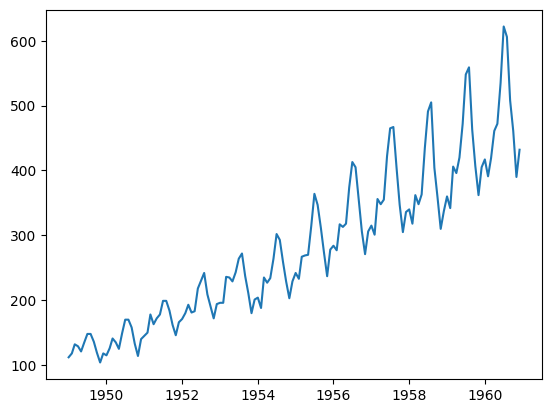

In [22]:
plt.plot(time_series)
plt.show()

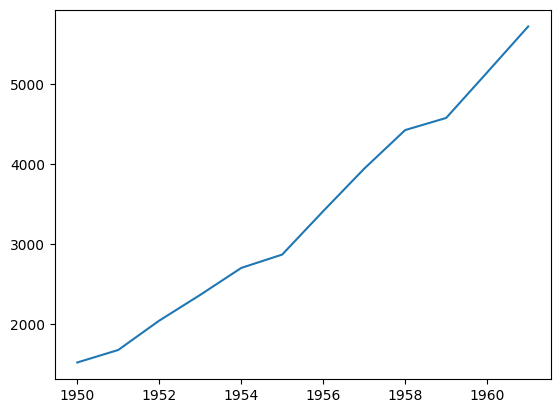

In [23]:
#esta resampleando a serie temporal para o nivel anual('A' - indica resampling anual) e em seguida
#somando os valores dentro de cada ano
time_series_ano = time_series.resample('A').sum()
plt.plot(time_series_ano)
plt.show()

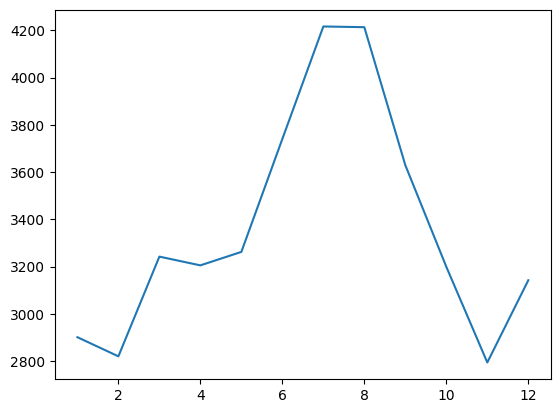

In [24]:
time_series_mes = time_series.groupby([lambda x: x.month]).sum()
plt.plot(time_series_mes)
plt.show()

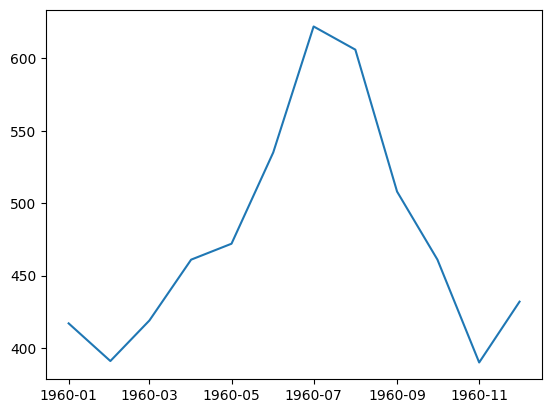

In [25]:
time_series_datas = time_series['1960-01-01':'1960-12-01']
plt.plot(time_series_datas)
plt.show()

In [28]:
#Decomposição da serie temporal
decomposicao = seasonal_decompose(time_series)
tendencia = decomposicao.trend
sazonal = decomposicao.seasonal
aleatorio = decomposicao.resid

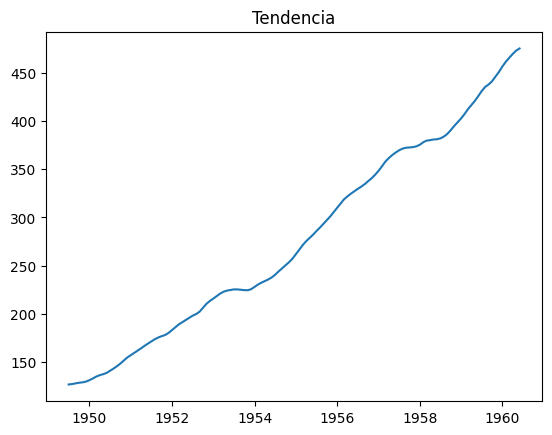

In [27]:
plt.title("Tendencia")
plt.plot(tendencia)
plt.show()

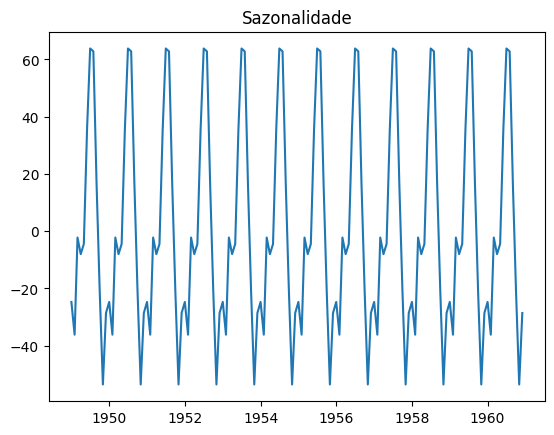

In [29]:
plt.title('Sazonalidade')
plt.plot(sazonal)
plt.show()

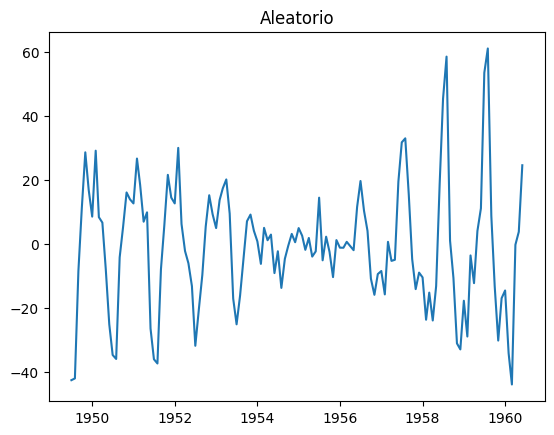

In [30]:
plt.title('Aleatorio')
plt.plot(aleatorio)
plt.show()

In [31]:
# previsão com ARIMA
#parametros p, q e d

In [32]:
model = auto_arima(time_series)
#traz os melhores parametros para o ARIMA
print(model.order)

(4, 1, 3)


In [33]:
predictions = model.predict(n_periods=24)
print(predictions)

1961-01-01    467.573736
1961-02-01    490.494460
1961-03-01    509.136849
1961-04-01    492.554702
1961-05-01    495.305965
1961-06-01    475.947817
1961-07-01    476.339865
1961-08-01    475.552147
1961-09-01    472.353805
1961-10-01    483.889647
1961-11-01    475.570149
1961-12-01    485.921508
1962-01-01    479.133602
1962-02-01    480.987421
1962-03-01    482.221399
1962-04-01    476.211021
1962-05-01    483.942815
1962-06-01    475.847349
1962-07-01    482.794250
1962-08-01    479.011953
1962-09-01    479.518625
1962-10-01    482.449447
1962-11-01    476.973939
1962-12-01    483.511016
Freq: MS, dtype: float64


In [34]:
#grafico de previsoes
print(len(time_series))

144


In [35]:
train = time_series[:130]
teste = time_series[130:]

In [36]:
print(teste.index)

DatetimeIndex(['1959-11-01', '1959-12-01', '1960-01-01', '1960-02-01',
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', freq=None)


In [39]:
model2 = auto_arima(train, suppress_warnings=True)
prediction = pd.DataFrame(model2.predict(n_periods=14), index=teste.index)
prediction.columns = ['passengers_predictions']
print(prediction)

            passengers_predictions
Month                             
1959-11-01              357.690511
1959-12-01              334.857449
1960-01-01              342.488592
1960-02-01              375.944534
1960-03-01              424.126300
1960-04-01              473.151468
1960-05-01              510.388415
1960-06-01              527.724284
1960-07-01              523.268370
1960-08-01              501.198802
1960-09-01              469.991493
1960-10-01              439.680418
1960-11-01              418.990050
1960-12-01              413.125647


In [41]:
mse_arima = mean_squared_error(teste, prediction)
print("Erro quadratico medio MSE", mse_arima)


Erro quadratico medio MSE 2588.9122107225785


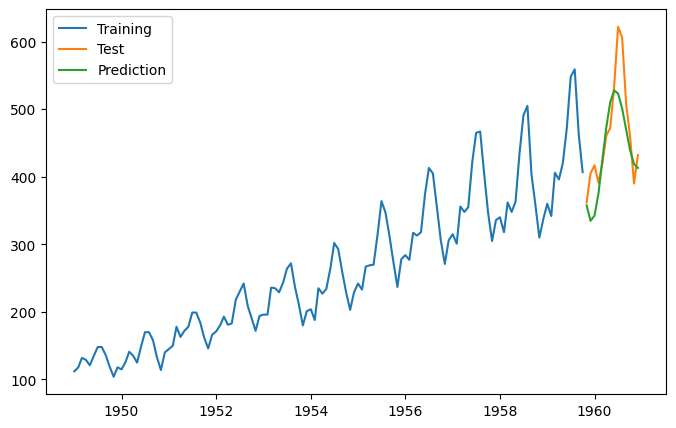

In [44]:
plt.figure(figsize=(8,5))
plt.plot(train, label='Training')
plt.plot(teste, label='Test')
plt.plot(prediction,label='Prediction')
plt.legend()